In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Define helper functions

# Convert 8x8 binary pattern to bipolar (-1/1) vector
def binary_to_bipolar(pattern):
    return np.array([1 if bit == '1'
                     else -1 for row in pattern for bit in row])

# Convert bipolar vector to binary for plotting
def bipolar_to_binary(vector):
    return np.array([1 if value == 1 
                     else 0 for value in vector])

# Plot 8x8 pattern 
def plot_pattern(vector, title=""):
    plt.imshow(bipolar_to_binary(vector).reshape((8,8)), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [18]:
# Define train and recall functions

def train(patterns):
    N = len(patterns[0])
    W = np.zeros((N, N))
    for p in patterns:
        W += np.outer(p, p)
    np.fill_diagonal(W, 0)
    W /= N
    return W

def recall(W, pattern, steps=5):
    state = pattern.copy()
    for _ in range(steps):
        indices = np.random.permutation(len(state))
        for i in indices:
            state[i] = 1 if np.dot(W[i], state) >= 0 else -1
    return state

In [19]:
# Create 8x8 patterns and train network on them

smiley_pattern = [
    "00111100",
    "01000010",
    "10100101",
    "10000001",
    "10100101",
    "10011001",
    "01000010",
    "00111100"
]

hash_pattern = [
    "00100100",
    "00100100",
    "11111111",
    "00100100",
    "00100100",
    "11111111",
    "00100100",
    "00100100"
]

x_pattern = [
    "10000001",
    "01000010",
    "00100100",
    "00011000",
    "00011000",
    "00100100",
    "01000010",
    "10000001"
]

# Convert to bipolar
smiley_bipolar = binary_to_bipolar(smiley_pattern)
hash_bipolar = binary_to_bipolar(hash_pattern)
x_bipolar = binary_to_bipolar(x_pattern)

# Train network
patterns = [smiley_bipolar, hash_bipolar, x_bipolar]
W = train(patterns)

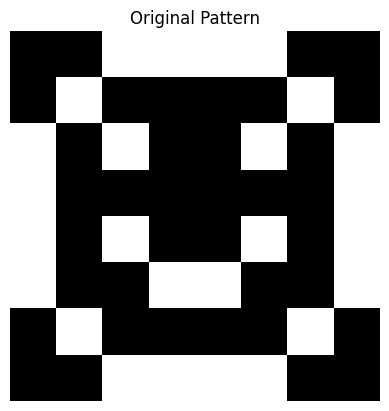

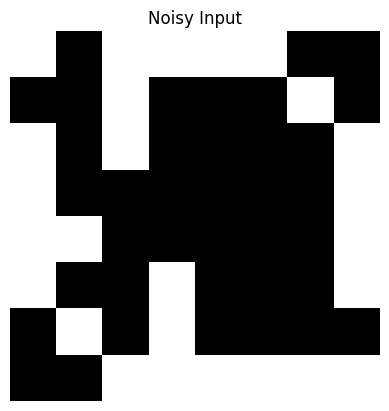

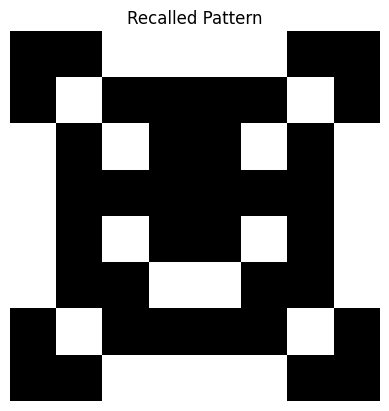

In [20]:
# Add noise and recall pattern

noisy_input = smiley_bipolar.copy() # Can also use hash or x

# Randomly flip 20% of bits
flip_indices = np.random.choice(range(len(noisy_input)), 
                                size=int(0.2*len(noisy_input)), 
                                replace=False)
noisy_input[flip_indices] *= -1

recalled = recall(W, noisy_input)

# Plot
plot_pattern(smiley_bipolar, "Original Pattern")
plot_pattern(noisy_input, "Noisy Input")
plot_pattern(recalled, "Recalled Pattern")